In [58]:
import numpy as np
import pandas as pd
import functools
import sys
import math

type1='fav_yes_1'
num=1
lbl='Ochiai-2'



#type2='yes_1'
if type1=='unfav_yes_1':
  title1='BPM'
else:
  title1='GPM'

file1=pd.read_csv('/Users/macbook/Desktop/APOP_PAN_CANCER/fav_unfav/01/pancancer_survival_'+str(type1)+'.csv')
#unfav=pd.read_csv('pancancer_survival_unfav_'+str(type1)+'.csv')
cancers=(file1.columns)[1:]

In [59]:
def c1_c2(c1,c2,file1):    
    a=0
    b=0
    c=0
    d=0
    if c1==c2:
      S=1
    else:
      S=0
    for i in range(file1.shape[0]):
        if (file1.iloc[i,c1]==1) & (file1.iloc[i,c2]==1):
            a=a+1
        if (file1.iloc[i,c1]==1) & (file1.iloc[i,c2]==0): 
            b=b+1
        if (file1.iloc[i,c1]==0) & (file1.iloc[i,c2]==1):
            c=c+1
        if (file1.iloc[i,c1]==0) & (file1.iloc[i,c2]==0): 
            d=d+1
        try:
#           S=a/(a+b+c) #jaccard
#           S=2*a/(2*a+b+c)#dice
#           S=a/math.sqrt((a+b)*(a+c))#ochiai-1
#           S=(a/2)*((1/(a+b))+(1/(a+c)))#kulzcynzki-2
#           S=a/min(a+b,a+c)#simpson
#           S=a/(a+b+c+d)#russell-rao
#           S=(a+d)/(a+2*b+2*c+d)#rogers-tanimoto
          S=(a*d)/math.sqrt((a+b)*(a+c)*(b+d)*(c+d))#ochiai-2
        except:
          pass


    
    #sim=round((nf+nuf)/d,3)
    #disim=round((nx)/d,3)
    #print(nf,nuf,nx,d)
    return round(S,4)

In [60]:
s = file1.shape[1]-1
df_S = pd.DataFrame(0, index=range(s), columns=range(s))

for i in range(1,34):
    for j in range(1,34):
        df_S.iloc[i-1,j-1]=c1_c2(i,j,file1)

df_S.columns=cancers
df_S.index=cancers


df_S.to_csv('/Users/macbook/Desktop/APOP_PAN_CANCER/jaccard/matrices/'+str(lbl)+'_'+str(title1)+'.csv',index=True,header=True)

In [61]:
g1=df_S.to_numpy()
g1=g1[np.triu_indices_from(g1, k=1)]

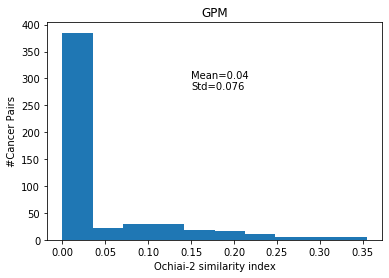

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(g1)
plt.ylabel('#Cancer Pairs')
plt.xlabel(str(lbl)+' similarity index')
plt.title(title1)
plt.text(0.15, 300, 'Mean='+str(round(np.mean(g1),3)))
plt.text(0.15, 280, 'Std='+str(round(np.std(g1),3)))
plt.savefig('/Users/macbook/Desktop/APOP_PAN_CANCER/jaccard/freq_plots/'+str(lbl)+'_'+str(title1)+'.png')
plt.show()

In [63]:
np.mean(g1)

0.03983030303030303

In [64]:
np.std(g1)

0.07604339165936569

In [65]:
x=[]
for k in range(len(cancers)):
  l=k+1
  while l!=33:
    x.append(str(cancers[k])+'_'+str(cancers[l]))
    l=l+1
dfdf=pd.DataFrame()
dfdf['c1_c2']=x
dfdf[str(lbl)+'_'+str(title1)]=g1

In [66]:
dfdf.to_csv('/Users/macbook/Desktop/APOP_PAN_CANCER/jaccard/single_col/'+str(lbl)+'_'+str(title1)+'.csv',index=False,header=True)